In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/processed/final_data.csv')

In [3]:
df

,ID,Gender,Car,Realty,Childnmbr,TotalIncome,Incometype,Edu,Fam,Housing,...,workphn,phone,email,Occupation,famsize,Age,WorkingYears,Bad_Debt,Good_Debt,debt_status
0,5008806,1,1,1,0,112500.0,4,4,1,1,...,0,0,0,16,2.0,58,3.106849,7.0,23.0,good
1,5008808,0,0,1,0,270000.0,0,4,3,1,...,0,1,1,14,1.0,52,8.358904,2.0,3.0,good
2,5008809,0,0,1,0,270000.0,0,4,3,1,...,0,1,1,14,1.0,52,8.358904,0.0,5.0,good
3,5008810,0,0,1,0,270000.0,0,4,3,1,...,0,1,1,14,1.0,52,8.358904,6.0,21.0,good
4,5008811,0,0,1,0,270000.0,0,4,3,1,...,0,1,1,14,1.0,52,8.358904,6.0,33.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304349,6837707,1,0,1,0,202500.0,4,1,0,1,...,1,0,0,8,2.0,37,6.326027,0.0,0.0,no_record
304350,6839936,1,1,1,1,135000.0,4,4,1,1,...,0,0,0,8,3.0,34,5.739726,0.0,0.0,no_record
304351,6840222,0,0,0,0,103500.0,4,4,3,1,...,0,0,0,8,1.0,43,8.238356,0.0,0.0,no_record
304352,6841878,0,0,0,0,54000.0,0,1,3,5,...,1,0,0,14,1.0,22,1.019178,0.0,0.0,no_record


In [4]:
# Separar características y etiqueta
X = df.drop(['debt_status', 'Good_Debt', 'Bad_Debt'], axis=1)
y = df['debt_status']

In [5]:
# Dividir en entrenamiento y prueba (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Logistic Regression

In [6]:
# Entrenar modelo con pesos balanceados
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [7]:
# Predicciones
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [9]:
# Reporte de clasificación
print("📄 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/Users/juanfelipe/Proyectos/credit_approval/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanfelipe/Proyectos/credit_approval/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


📄 Classification Report:
               precision    recall  f1-score   support

         bad       0.07      0.33      0.11      2407
        good       0.00      0.00      0.00      2620
   no_record       0.93      0.82      0.87     55844

    accuracy                           0.76     60871
   macro avg       0.33      0.38      0.33     60871
weighted avg       0.86      0.76      0.80     60871

🧮 Confusion Matrix:
 [[  798     0  1609]
 [  873     0  1747]
 [10108     0 45736]]


/Users/juanfelipe/Proyectos/credit_approval/env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [11]:
# Cargar datos
df = pd.read_csv('../data/processed/final_data.csv')

In [12]:
# Separar variables y etiqueta
X = df.drop(['debt_status', 'Good_Debt', 'Bad_Debt'], axis=1)
y = df['debt_status']

In [24]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, 
    test_size=0.3, 
    random_state=42
)


In [26]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 200),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(model, X_train, y_train, cv=3, scoring='f1_weighted').mean()

In [27]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)   

[I 2025-06-15 22:23:04,672] A new study created in memory with name: no-name-ffc8d6a7-b521-4bdd-a5e3-a4b1d0b338b6
[I 2025-06-15 22:24:54,759] Trial 0 finished with value: 0.8526129223212209 and parameters: {'n_estimators': 161, 'max_depth': 13, 'min_samples_split': 7}. Best is trial 0 with value: 0.8526129223212209.
[I 2025-06-15 22:26:05,142] Trial 1 finished with value: 0.8748229391480296 and parameters: {'n_estimators': 93, 'max_depth': 15, 'min_samples_split': 2}. Best is trial 1 with value: 0.8748229391480296.
[I 2025-06-15 22:27:17,220] Trial 2 finished with value: 0.9211752682971096 and parameters: {'n_estimators': 71, 'max_depth': 30, 'min_samples_split': 7}. Best is trial 2 with value: 0.9211752682971096.
[I 2025-06-15 22:29:23,160] Trial 3 finished with value: 0.8391951906858607 and parameters: {'n_estimators': 196, 'max_depth': 12, 'min_samples_split': 9}. Best is trial 2 with value: 0.9211752682971096.
[I 2025-06-15 22:30:13,932] Trial 4 finished with value: 0.8811018275303

In [28]:
print("Best parameters:", study.best_params)
print("F1 Score:", study.best_value)

Best parameters: {'n_estimators': 115, 'max_depth': 30, 'min_samples_split': 6}
F1 Score: 0.9217895232148473


In [29]:
rf = RandomForestClassifier(**study.best_params)

In [30]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=6, n_estimators=115)

In [31]:
#Prediction on the trained set
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  

In [32]:
#Performance Metrics
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Classification Report:
              precision    recall  f1-score   support

         bad       0.89      0.89      0.89     83654
        good       0.89      0.89      0.89     83932
   no_record       1.00      1.00      1.00     83712

    accuracy                           0.93    251298
   macro avg       0.93      0.93      0.93    251298
weighted avg       0.93      0.93      0.93    251298



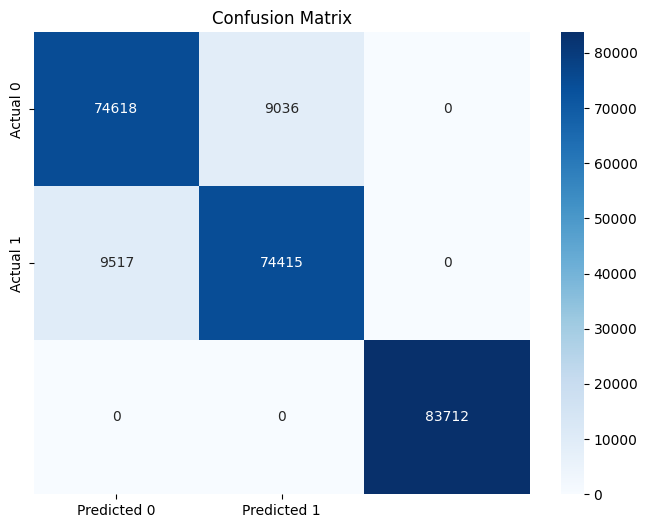

In [33]:
#Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

/var/folders/7v/mlpbd2vj15s13pz4rjm4bq1m0000gn/T/ipykernel_14656/2994936626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf.feature_importances_, y=X_train.columns, palette='viridis')


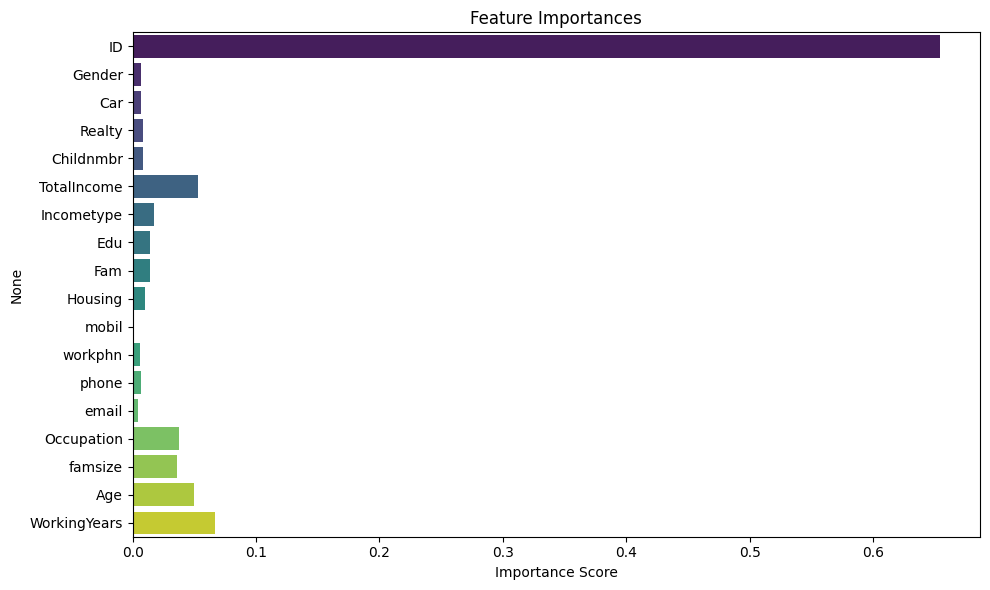

In [34]:
#Importance Score Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=rf.feature_importances_, y=X_train.columns, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [35]:
import joblib

In [36]:
joblib.dump(rf, '../models/rf_credit_model.pkl')

['../models/rf_credit_model.pkl']

# XGBoost

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Cargar dataset preprocesado
df = pd.read_csv('../data/processed/final_data.csv')

In [31]:
# Separar X e y
X = df.drop(columns=['LABEL'])
y = df['LABEL']

In [32]:
# Dividir dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

In [33]:
# Calcular peso para balancear clases
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

In [35]:
# Instanciar y entrenar XGBoost
xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

In [36]:
xgb.fit(X_train, y_train)

/Users/juanfelipe/Proyectos/credit_approval/env/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [21:05:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [37]:
# Predicciones
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

In [38]:
print("📄 Classification Report:\n", classification_report(y_test, y_pred))
print("🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("🔢 ROC AUC Score:", roc_auc_score(y_test, y_prob))

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.63      0.37       891
           1       0.94      0.76      0.84      6401

    accuracy                           0.74      7292
   macro avg       0.60      0.69      0.61      7292
weighted avg       0.85      0.74      0.78      7292

🧮 Confusion Matrix:
 [[ 562  329]
 [1547 4854]]
🔢 ROC AUC Score: 0.7540194775262212


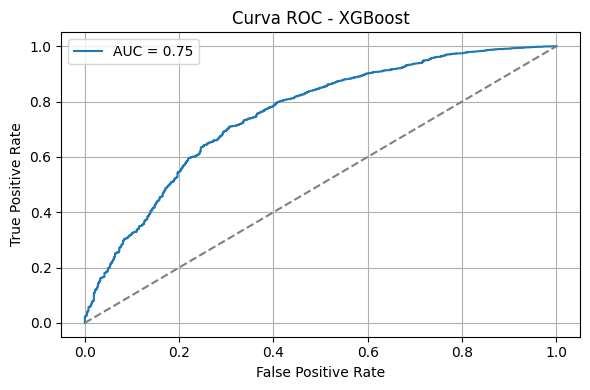

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC - XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

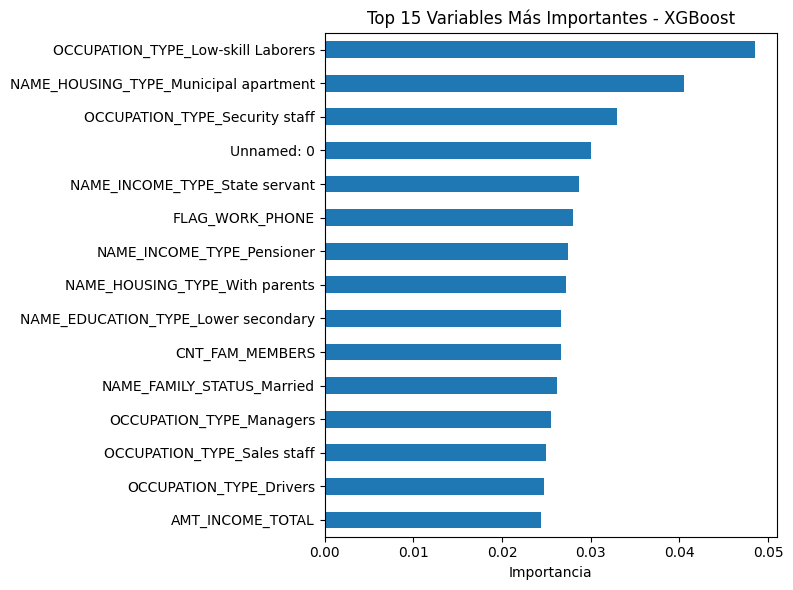

OCCUPATION_TYPE_Low-skill Laborers       0.048581
NAME_HOUSING_TYPE_Municipal apartment    0.040570
OCCUPATION_TYPE_Security staff           0.032915
Unnamed: 0                               0.030021
NAME_INCOME_TYPE_State servant           0.028700
FLAG_WORK_PHONE                          0.028001
NAME_INCOME_TYPE_Pensioner               0.027434
NAME_HOUSING_TYPE_With parents           0.027228
NAME_EDUCATION_TYPE_Lower secondary      0.026680
CNT_FAM_MEMBERS                          0.026662
NAME_FAMILY_STATUS_Married               0.026190
OCCUPATION_TYPE_Managers                 0.025480
OCCUPATION_TYPE_Sales staff              0.024989
OCCUPATION_TYPE_Drivers                  0.024763
AMT_INCOME_TOTAL                         0.024432
dtype: float32


In [40]:
importances = pd.Series(xgb.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Top 15
plt.figure(figsize=(8, 6))
importances_sorted.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top 15 Variables Más Importantes - XGBoost')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Ver como tabla
print(importances_sorted.head(15))

# SMOTE + Random Forest

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE